### Importando bibliotecas e dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv')

### Overview do dataset

In [3]:
df.head(15)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
print(df.describe())

            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25%         

### Apagando colunas que não serão usadas na análise

In [6]:
colunas_apagar = ['Sl_No', 'Customer Key']
df.drop(colunas_apagar, axis = 1, inplace = True)
print(df)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  
0                      1                 0  
1                     10                 9  
2                      3                 4  
3                      1                 4  
4     

#### Renomeando colunas 

In [7]:
dic_culumns = {
    'Avg_Credit_Limit': 'Limite_medio_credito',
    'Total_Credit_Cards': 'Qtd_cartoes_credito',	
    'Total_visits_bank': 'Total_visitas_banco',	
    'Total_visits_online': 'Total_visitas_online',	
    'Total_calls_made': 'Total_chamadas_feitas'
}

df.rename(columns = dic_culumns, inplace=True)
print(df)

     Limite_medio_credito  Qtd_cartoes_credito  Total_visitas_banco  \
0                  100000                    2                    1   
1                   50000                    3                    0   
2                   50000                    7                    1   
3                   30000                    5                    1   
4                  100000                    6                    0   
..                    ...                  ...                  ...   
655                 99000                   10                    1   
656                 84000                   10                    1   
657                145000                    8                    1   
658                172000                   10                    1   
659                167000                    9                    0   

     Total_visitas_online  Total_chamadas_feitas  
0                       1                      0  
1                      10                    

Gráfico 'distribuicao_Limite_medio_credito.png' salvo.
Gráfico 'distribuicao_Qtd_cartoes_credito.png' salvo.
Gráfico 'distribuicao_Total_visitas_banco.png' salvo.
Gráfico 'distribuicao_Total_visitas_online.png' salvo.
Gráfico 'distribuicao_Total_chamadas_feitas.png' salvo.


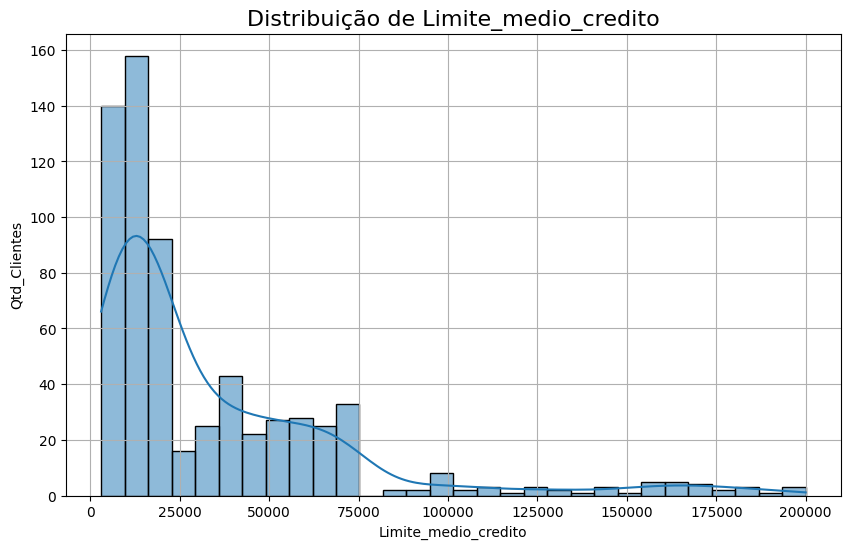

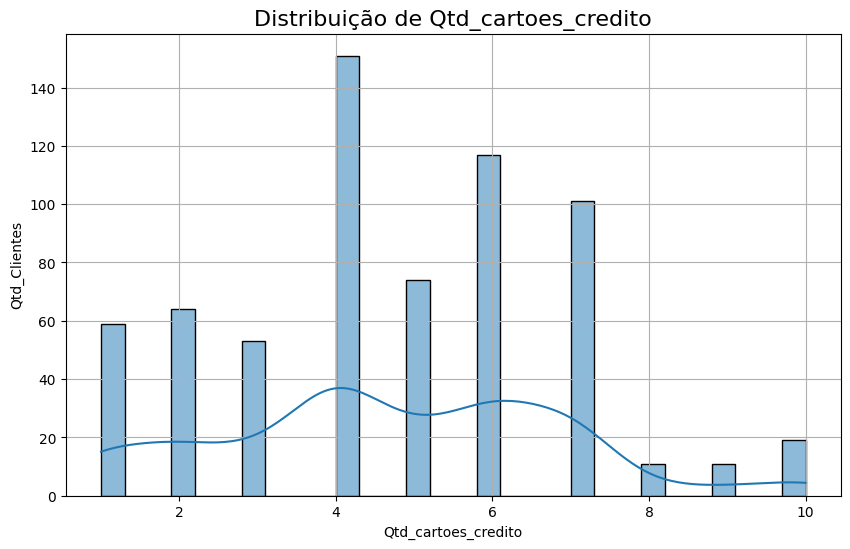

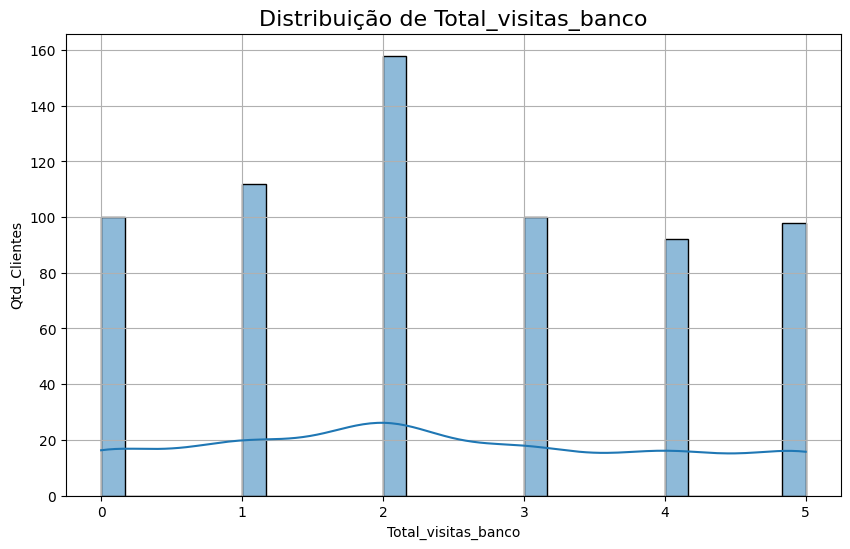

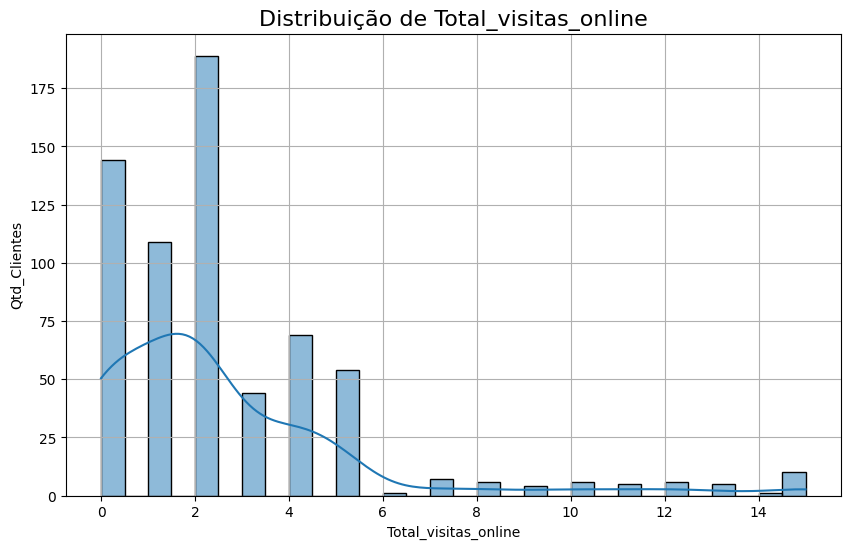

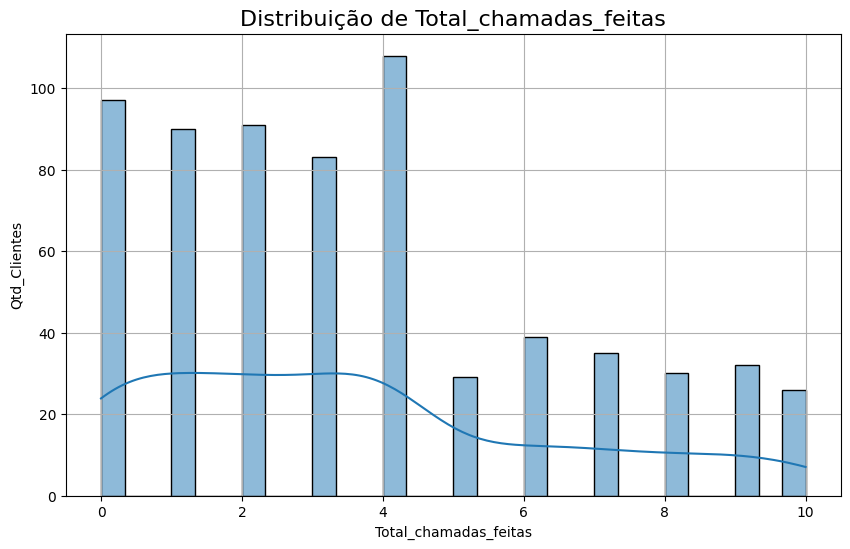

In [8]:
import os
if not os.path.exists('graficos'):
    os.makedirs('graficos')

comportamento = ['Limite_medio_credito', 'Qtd_cartoes_credito', 'Total_visitas_banco', 'Total_visitas_online', 'Total_chamadas_feitas']

for col in comportamento:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Qtd_Clientes')
    plt.grid(True)
    plt.savefig(f'graficos/distribuicao_{col}.png')
    print(f"Gráfico 'distribuicao_{col}.png' salvo.")

In [9]:
valor_cliente =  ['Limite_medio_credito', 'Qtd_cartoes_credito', 'Total_visitas_banco', 'Total_visitas_online', 'Total_chamadas_feitas']
df_valor_cliente = df[valor_cliente]

scaler = StandardScaler() #Por usar escalas diferentes é necessário normalizar os dados para que tenham o mesmo peso
df_valor_cliente_scaled = scaler.fit_transform(df_valor_cliente)


## Lista para guardar a soma dos quadrados intra-clusters e teste de 1 a 10 clusters

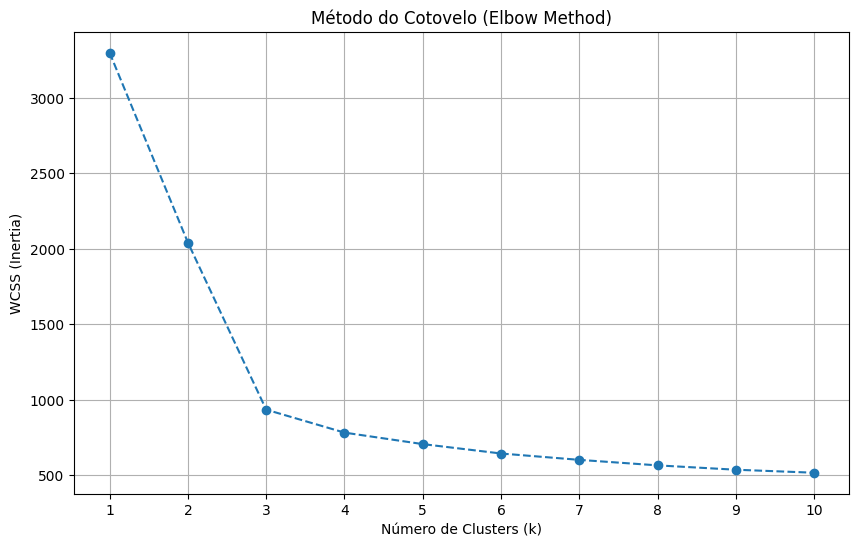

In [10]:
wcss = [] #wcss é soma dos quadrados dentro do cluester
k_range = range(1, 11) 
for k in k_range:
    kmeans_elbow = KMeans(n_clusters = k,
                         init = 'k-means++', ##construtor automático
                         n_init = 10,
                         random_state = 42) #semente de nº aleatório
    kmeans_elbow.fit(df_valor_cliente_scaled)
    wcss.append(kmeans_elbow.inertia_)

#criando o gráfico:

plt.figure(figsize = (10,6))
plt.plot(k_range, wcss, marker= 'o', linestyle = '--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(k_range)

elblow_plot_filename = 'elbow_plot.png'
plt.savefig(elblow_plot_filename)


In [11]:
k_ideal = 3 # 3 foi onde formou o cotovelo, indicando que a qtd de clusters ideais é esse nº

kmeans= KMeans(n_clusters = k_ideal, init='k-means++', n_init = 10, random_state=42)
kmeans.fit(df_valor_cliente_scaled)
df['Cluster'] = kmeans.labels_ #atribuição do cluster pertencente a cada cliente

cluster_perfil = df.groupby('Cluster')[valor_cliente].mean() #agrupamento e média de cada perfil

cluster_perfil['Qtd_Clientes'] = df['Cluster'].value_counts().sort_index()#add qtd de clientes/cluster

print("\n-- Perfis dos Clusters(Médias) --")
print(cluster_perfil)

salvar_perfil= 'cluster_perfil.csv'
cluster_perfil.to_csv(salvar_perfil)




-- Perfis dos Clusters(Médias) --
         Limite_medio_credito  Qtd_cartoes_credito  Total_visitas_banco  \
Cluster                                                                   
0                33782.383420             5.515544             3.489637   
1                12174.107143             2.410714             0.933036   
2               141040.000000             8.740000             0.600000   

         Total_visitas_online  Total_chamadas_feitas  Qtd_Clientes  
Cluster                                                             
0                    0.981865               2.000000           386  
1                    3.553571               6.870536           224  
2                   10.900000               1.080000            50  


Gerando visualização pairplot (pode demorar alguns segundos)...
Gráfico Pairplot salvo como: cluster_pairplot.png

--- Análise Concluída com Sucesso! ---


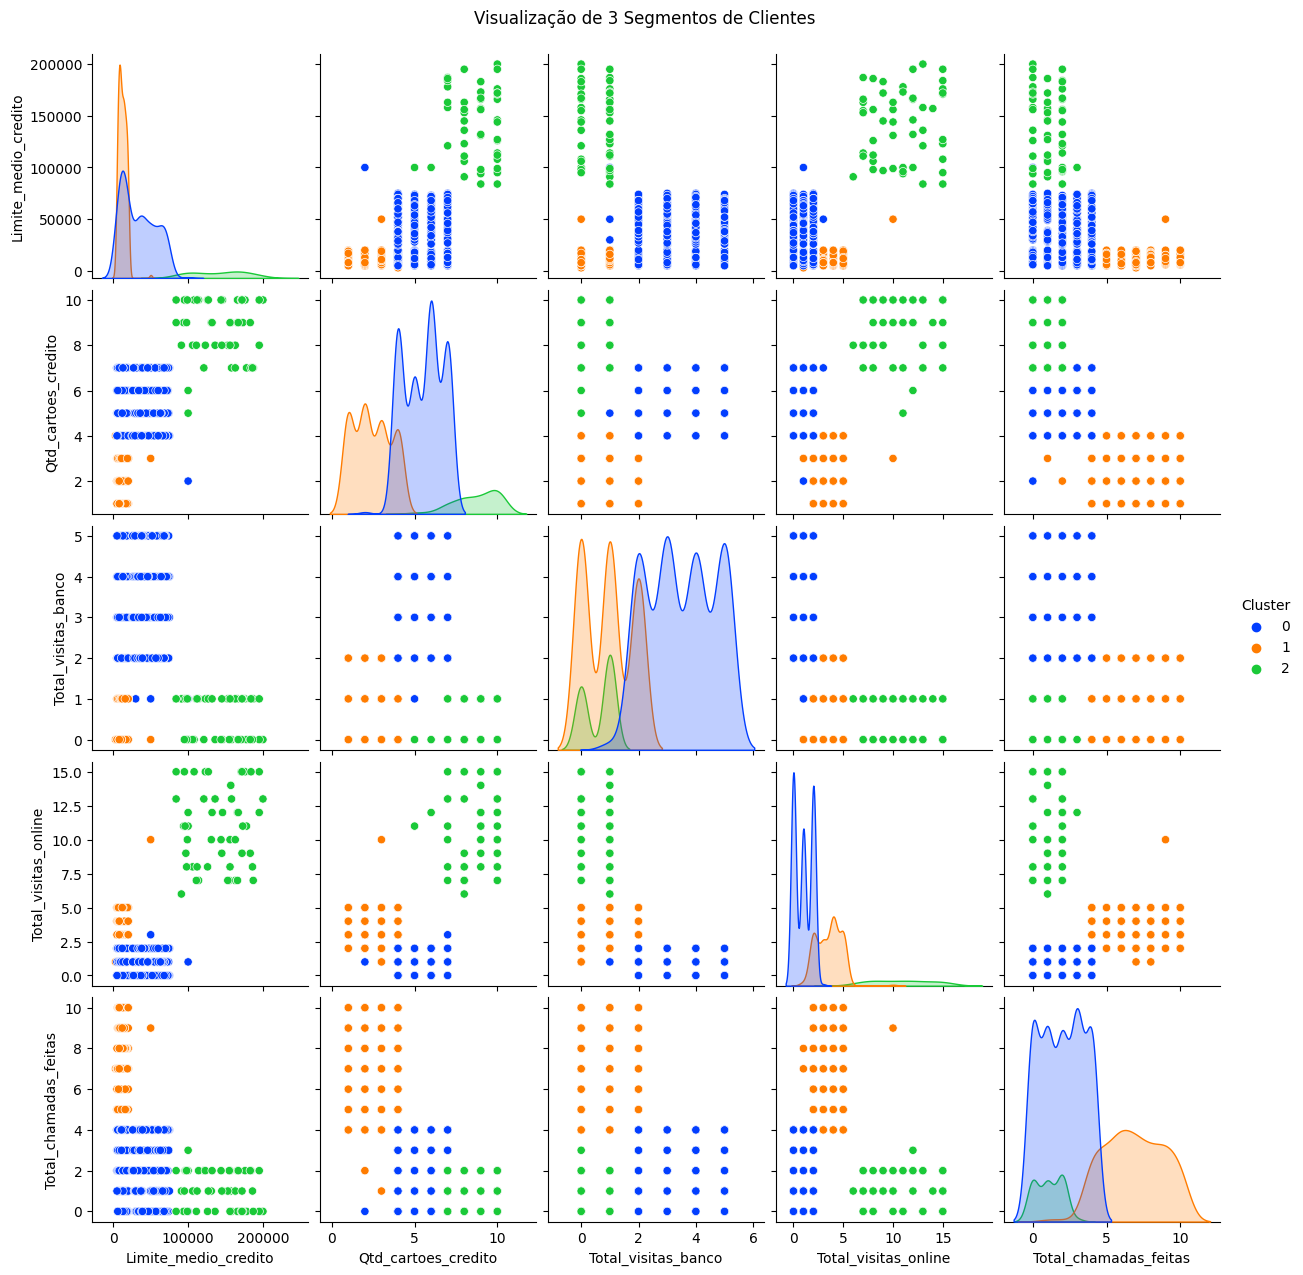

In [12]:
print("Gerando visualização pairplot (pode demorar alguns segundos)...")
pairplot_fig = sns.pairplot(df, 
                            hue='Cluster',        # Colorir por cluster
                            vars=df_valor_cliente,        # Usar apenas as nossas features
                            palette='bright')     # Esquema de cores
pairplot_fig.fig.suptitle(f'Visualização de {k_ideal} Segmentos de Clientes', y=1.02)

# Salvar o gráfico pairplot
pairplot_filename = 'cluster_pairplot.png'
pairplot_fig.savefig(pairplot_filename)

print(f"Gráfico Pairplot salvo como: {pairplot_filename}")
print("\n--- Análise Concluída com Sucesso! ---")